# Low Resource Language ASR model
### Lars Ericson, Catskills Research Company, OpenASR20

In [ ]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
%load_ext autoreload
%autoreload 2

In [ ]:
%matplotlib inline
import matplotlib.pylab as plt
import numpy as np

## Configuration

In [ ]:
from Cfg import Cfg
C = Cfg('NIST', 8000, 'amharic') 

## Recording Corpus

In [ ]:
from RecordingCorpus import RecordingCorpus
from multiprocessing import Pool

In [ ]:
if __name__ == '__main__':
    with Pool(16) as pool:
        recordings = RecordingCorpus(C, pool)

In [ ]:
recordings.sample_statistics()

In [ ]:
recordings.visualization()

In [ ]:
recordings.artifacts[0].display()

## Split corpus

In [ ]:
from SplitCorpus import SplitCorpus

In [ ]:
fat=SplitCorpus.from_recordings(C, recordings)

In [84]:
fat.sample_statistics()

,Corpus,Units,Measurement,Value
0,Graphemes,#Graphemes,Distinct graphemes in all transcriptions,234.000000
1,Graphemes,Length in samples,Max,95040.000000
2,Graphemes,Length in samples,Mean,2395.130106
3,Graphemes,Length in samples,Median,1194.666667
4,Graphemes,Length in samples,Min,67.692308
5,Graphemes,Length in seconds,Max,11.880000
6,Graphemes,Length in seconds,Mean,0.299391
7,Graphemes,Length in seconds,Median,0.149333
8,Graphemes,Length in seconds,Min,0.008462
9,Split Speech,Length in samples,Max,260080.000000


## Sub splitting based on words per split and average samples per grapheme (imperfect, introduces error)

### Trim all samples aggressively and examine the longest trimmed 1-word sample and resulting distribution

In [ ]:
skinny=fat.aggressive_clip_ends()

In [ ]:
one_word_fat=[x for x in fat.artifacts if x.target.n_words==1]
one_word_skinny=[x for x in skinny.artifacts if x.target.n_words==1]
both=list(zip(one_word_fat, one_word_skinny))
one_word=sorted(both, key = lambda x: x[0].source.n_samples)
len(one_word)

In [ ]:
(old,new)=one_word[-1]

In [ ]:
old.display()

In [ ]:
new.display()

In [ ]:
fat.diff_sample_statistics(skinny)

In [ ]:
fat.diff_visualization(skinny)

### Split the longest sample by silence gaps, aggressively trim each, then allocate graphemes evenly over the clips, maximizing alignment of graphemes to word boundaries on silence

In [ ]:
df=skinny.sample_statistics()
max_words=int(df[(df.Corpus=="Split Transcription") & (df.Units=="Length in words") & (df.Measurement=="Max")].Value.values[0])
max_words

In [ ]:
target_max_sample_length=int(df[(df.Corpus=="Split Speech") & (df.Units=="Length in samples") & (df.Measurement=="Median")].Value.values[0])
target_max_sample_length

In [ ]:
.df

## Split corpus down to median length

In [273]:
from SubSplitCorpus import SubSplitCorpus

In [274]:
subsplits=SubSplitCorpus(skinny)

In [93]:
len(subsplits.problems)

1

In [94]:
skinny.diff_sample_statistics(subsplits) 

,Corpus,Units,Measurement,Value_x,Value_y
2,Graphemes,Length in samples,Mean,2260.042214,1520.976189
3,Graphemes,Length in samples,Median,1168.484848,858.871212
4,Graphemes,Length in samples,Min,67.692308,102.533333
6,Graphemes,Length in seconds,Mean,0.282505,0.190122
7,Graphemes,Length in seconds,Median,0.146061,0.107359
8,Graphemes,Length in seconds,Min,0.008462,0.012817
9,Split Speech,Length in samples,Max,253332.000000,95840.000000
10,Split Speech,Length in samples,Mean,28868.977701,11925.725730
11,Split Speech,Length in samples,Median,20880.000000,10745.000000
12,Split Speech,Length in samples,Min,522.000000,252.000000


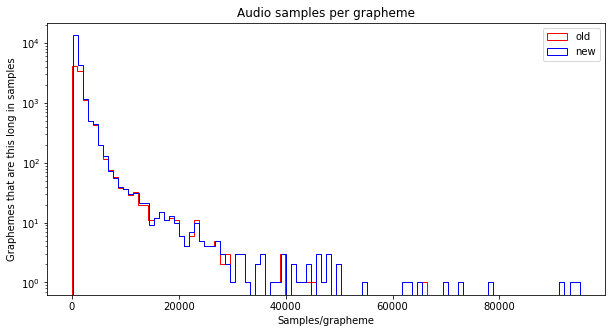

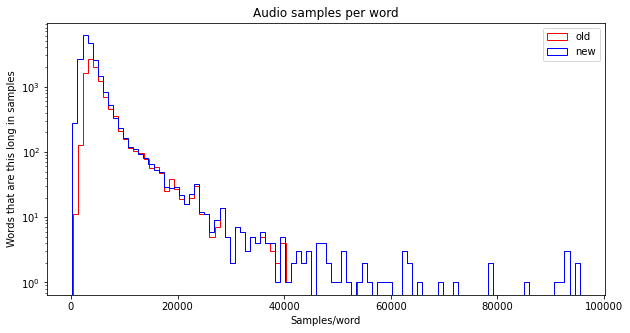

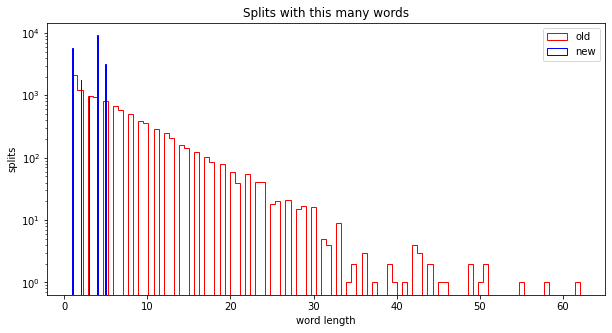

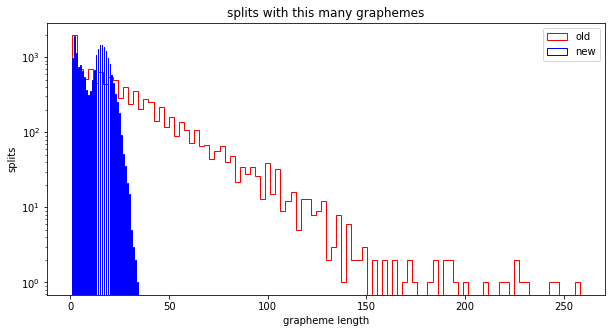

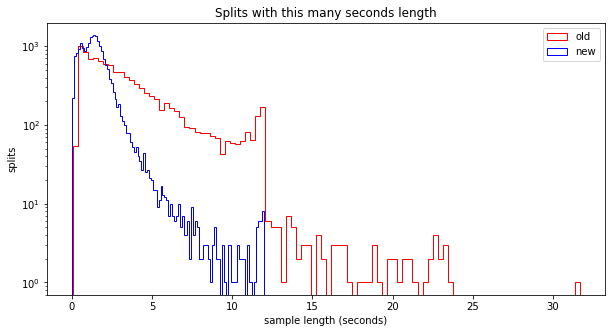

In [95]:
skinny.diff_visualization(subsplits) 

## Check I'm losing words

In [96]:
dp=skinny.check_vocabulary_change(subsplits)
len(dp)
print(f'lost {len(dp)} words' if len(dp) else 'no lost words!')

no lost words!


## Figure out why I'm still seeing a 11.98 second clip and fix that and redo subsplit

In [98]:
vars(subsplits.artifacts[0].source)

{'C': <Cfg.Cfg at 0x7f2415fe5130>,
 'value': array([-0.0005522 , -0.0005522 , -0.0005522 , ...,  0.00034075,
         0.00034075,  0.00034075], dtype=float32),
 'n_samples': 4240,
 'n_seconds': 0.53}

In [100]:
long_ones=[x for x in subsplits.artifacts if x.source.n_seconds >= 11.98]

In [266]:
from aggressive_clip_ends import aggressive_clip_ends

In [271]:
clipped,bounds=aggressive_clip_ends(long_ones[0].source.value, 8000)

In [272]:
Audio(clipped,rate=8000)

In [191]:
sample_rate=8000

In [192]:
foo=longest_silence(audio)

In [250]:
import numpy as np
from itertools import groupby
from operator import itemgetter
(sound,window,threshold,min_gap,clip)=(audio,100,0.85,10,0.0005)

In [251]:
audio_moving=np.convolve(np.abs(sound), np.ones((window,))/window, mode='same') 
amplitudes=np.sort(audio_moving)
n_amp=audio_moving.shape[0]
cutoff=amplitudes[int(n_amp*threshold)]

In [252]:
cutoff

0.06829360015050043

In [253]:
silence_mask=audio_moving < cutoff

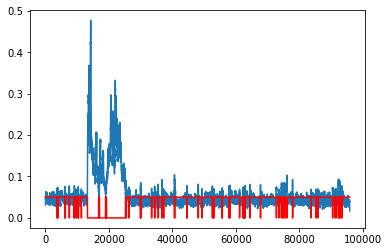

In [254]:
plt.plot(audio_moving)
plt.plot(silence_mask.astype(int)*0.05, color='red');

In [255]:
groups = [[i for i, _ in group] for key, group in groupby(enumerate(silence_mask), key=itemgetter(1)) if key]
boundaries=[(x[0],x[-1]) for x in groups]
silences=[(x,y) for x,y in boundaries if y-x > min_gap]
len(silences)

75

In [259]:
noisy_segment=list(sorted([(y-x,(x,y)) for x,y in silences]))[-1][1]

In [260]:
Audio(sound[noisy_segment[0]:noisy_segment[1]],rate=8000)

In [263]:
noisy_part = audio[noisy_segment[0]:noisy_segment[1]]
reduced_noise = nr.reduce_noise(audio_clip=audio, noise_clip=noisy_part, verbose=False)
normed_reduced_noise=normalize(reduced_noise)
window=100
audio_moving=np.convolve(np.abs(normed_reduced_noise), np.ones((window,))/window, mode='same') 
final, (start,end) = clip_ends(normed_reduced_noise, clip=cutoff)

In [264]:
Audio(final,rate=8000)

In [185]:
clipped,(start,end)=aggressive_clip_ends(long_ones[1].source.value, sample_rate)

/home/catskills/anaconda3/envs/openasr/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=437
  warnings.warn(


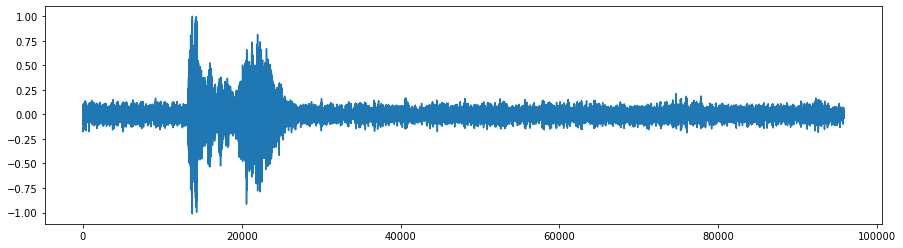

In [186]:
plt.figure(figsize=(15,4))
plt.plot(clipped);

In [187]:
Audio(clipped,rate=8000)

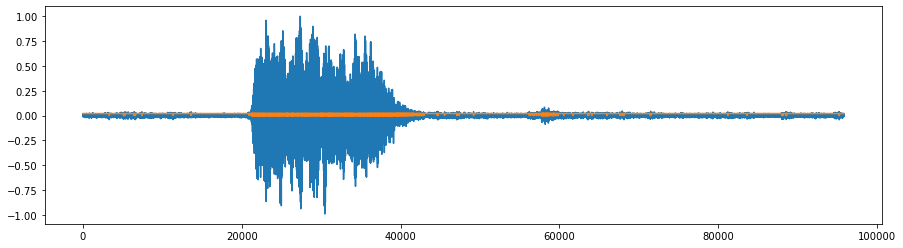

In [171]:
plt.figure(figsize=(15,4))
plt.plot(audio)
plt.plot(.02*silence_mask)

In [162]:
groups = [[i for i, _ in group] for key, group in groupby(enumerate(silence_mask), key=itemgetter(1)) if key]
boundaries=[(x[0],x[-1]) for x in groups]
silences=[(x/sample_rate,(y-N)/sample_rate) for x,y in boundaries if y-x > window]
len(silences)

19

In [164]:
audio.shape[0]/8000

11.98

In [163]:
if not len(silences):
    print("return", normalize(audio), (0, len(audio)))
longest_noise=sorted([(y-x,(x,y)) for x,y in silences])[-1][1]
longest_noise

(8.938, 10.150875)

In [165]:
noisy_segment=tuple(int(x*sample_rate) for x in longest_noise)
noisy_part = audio[noisy_segment[0]:min(noisy_segment[0]+window, noisy_segment[1])]

In [166]:
noisy_part

array([ 0.03001738,  0.0116571 ,  0.00118033, ..., -0.0126158 ,
       -0.00079054,  0.00906384], dtype=float32)

In [167]:
Audio(noisy_part,rate=8000)

In [ ]:
reduced_noise = nr.reduce_noise(audio_clip=audio, noise_clip=noisy_part, verbose=False)
normed_reduced_noise=normalize(reduced_noise)
cutoff=np.max(normed_reduced_noise[0:20])

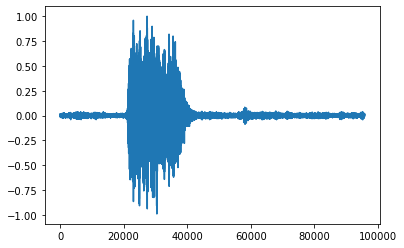

In [120]:
(audio, (start, end)) = aggressive_clip_ends(clip, 8000, cutoff)
plt.plot(audio)

In [150]:
Audio(audio,rate=8000)

KEY (0, 95840)
SOURCE


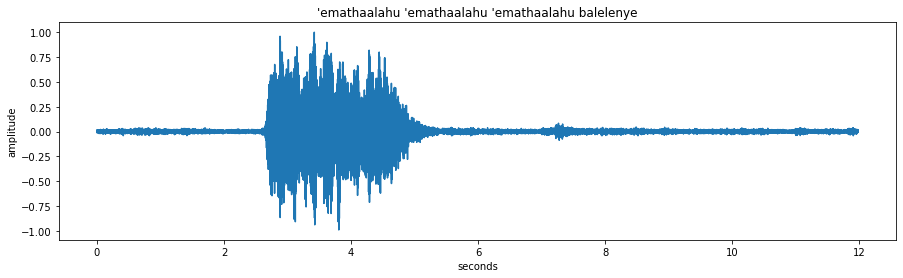

TARGET
እመጣለሁ እመጣለሁ እመጣለሁ በልልኝ :: 'emathaalahu 'emathaalahu 'emathaalahu balelenye



In [102]:
artifact.display()

KEY (0, 95840)
SOURCE


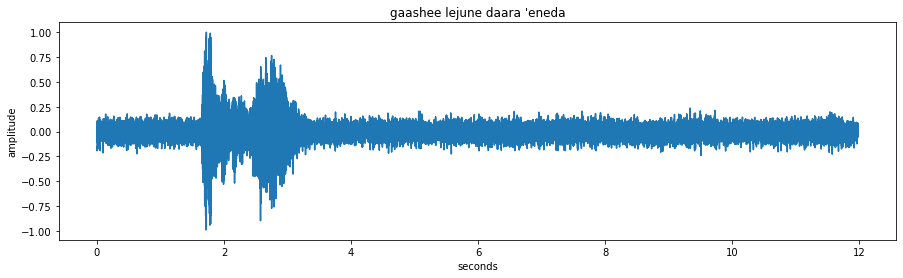

TARGET
ጋሼ ልጁን ዳረ እንደ :: gaashee lejune daara 'eneda



In [103]:
long_ones[1].display()

## Make a test training corpus

In [ ]:
clips=[]
for i, sound in enumerate(sounds):
    fn=f"frob/clip_{i}.wav"
    sf.write(fn, sound, C.sample_rate)
    clips.append(fn)

text='infer.txt'
manifest_fn='manifest.csv'
manifest='\n'.join([f'{audio},{text}' for audio in clips])
with open(manifest_fn, 'w') as f:        plt.show()
    f.write(manifest)

!cat manifest.csv

## ASR end-to-end speech-to-grapheme model stacked on top of grapheme-to-grapheme corrector model

In [ ]:
C.extension='_gradscaler'
C.batch_size=12
C.save_every = 5
C.start_from = 246

In [ ]:

import json, sys, os, librosa, random, math, time, torch
sys.path.append('/home/catskills/Desktop/openasr20/end2end_asr_pytorch')
os.environ['IN_JUPYTER']='True'
import numpy as np
import pandas as pd

from itertools import groupby
from operator import itemgetter
import soundfile as sf
from utils import constant
from utils.functions import load_model
from utils.data_loader import SpectrogramDataset, AudioDataLoader, BucketingSampler
from clip_ends import clip_ends
import torch.optim as optim
import torchtext
from torchtext.data import Field, BucketIterator
from torchtext.data import TabularDataset
import matplotlib.ticker as ticker
from IPython.display import Audio
from unidecode import unidecode
from seq_to_seq import *

In [ ]:
args=constant.args
args.continue_from=None
args.cuda = True
args.labels_path = C.grapheme_dictionary_fn
args.lr = 1e-4
args.name = C.model_name
args.save_folder = f'save'
args.epochs = 1000
args.save_every = 1
args.feat_extractor = f'vgg_cnn'
args.dropout = 0.1
args.num_layers = 4
args.num_heads = 8
args.dim_model = 512
args.dim_key = 64
args.dim_value = 64
args.dim_input = 161
args.dim_inner = 2048
args.dim_emb = 512
args.shuffle=True
args.min_lr = 1e-6
args.k_lr = 1
args.sample_rate=C.sample_rate
args.continue_from=C.best_model
args.augment=True
audio_conf = dict(sample_rate=args.sample_rate,
                  window_size=args.window_size,
                  window_stride=args.window_stride,
                  window=args.window,
                  noise_dir=args.noise_dir,
                  noise_prob=args.noise_prob,
                  noise_levels=(args.noise_min, args.noise_max))

In [ ]:
with open(args.labels_path, 'r') as label_file:
    labels = str(''.join(json.load(label_file)))
# add PAD_CHAR, SOS_CHAR, EOS_CHAR
labels = constant.PAD_CHAR + constant.SOS_CHAR + constant.EOS_CHAR + labels
label2id, id2label = {}, {}
count = 0
for i in range(len(labels)):
    if labels[i] not in label2id:
        label2id[labels[i]] = count
        id2label[count] = labels[i]
        count += 1
    else:
        print("multiple label: ", labels[i])

model, opt, epoch, metrics, loaded_args, label2id, id2label = load_model(constant.args.continue_from)

In [ ]:
train_data = SpectrogramDataset(audio_conf, manifest_filepath_list=[manifest_fn], 
                                label2id=label2id, normalize=True, augment=args.augment)
args.batch_size=1
train_sampler = BucketingSampler(train_data, batch_size=args.batch_size)
train_loader = AudioDataLoader(train_data, num_workers=args.num_workers, batch_sampler=train_sampler)

strs_hyps=[]
for i, (data) in enumerate(tqdm(train_loader)):
    src, tgt, _, src_lengths, tgt_lengths = data
    src = src.cuda()
    tgt = tgt.cuda()
    pred, gold, hyp_seq, gold_seq = model(src, src_lengths, tgt, verbose=False)
    seq_length = pred.size(1)
    for ut_hyp in hyp_seq:
        str_hyp = ""
        for x in ut_hyp:
            if int(x) == constant.PAD_TOKEN:
                break
            str_hyp = str_hyp + id2label[int(x)]
        strs_hyps.append(str_hyp)
for j in range(len(strs_hyps)):
    strs_hyps[j] = strs_hyps[j].replace(constant.SOS_CHAR, '').replace(constant.EOS_CHAR, '')

In [ ]:
gold_tgt = ' '.join([x.strip() for x in gold_tgt.split(' ') if x])
gold_tgt

In [ ]:
pred=' '.join(strs_hyps)
pred

In [ ]:
error_correction_training_fn='frob/pred_gold.tsv'
with open(error_correction_training_fn, 'w', encoding='utf-8') as f:
    f.write(f"{gold_tgt}\t{pred}")

In [ ]:
!cat frob/pred_gold.tsv

In [ ]:
SEED = 1234
random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)
torch.cuda.manual_seed(SEED)
torch.backends.cudnn.deterministic = True
tokenize=lambda x: [y for y in x]

SRC = Field(tokenize = tokenize, 
            init_token = '<sos>', 
            eos_token = '<eos>', 
            lower = True, 
            batch_first = True)

TRG = Field(tokenize = tokenize, 
            init_token = '<sos>', 
            eos_token = '<eos>', 
            lower = True, 
            batch_first = True)

In [ ]:
from torchtext.data import Iterator

In [ ]:
train_data = TabularDataset(
    path=error_correction_training_fn,
    format='tsv',
    fields=[('trg', TRG), ('src', SRC)])

In [ ]:
train_iterator = Iterator(train_data, batch_size=1)

In [ ]:
gold_fns=list(sorted(glob(f'{C.build_dir}/transcription_split/*.txt')))
len(gold_fns)
import os
goldrows=[]
for fn in gold_fns:
    with open(fn, 'r', encoding='utf-8') as f:
        goldrows.append(f.read())

MAX_LENGTH=max(len(x) for x in goldrows)+10
MAX_LENGTH

graphemes=''.join([x for x in C.grapheme_dictionary])

MIN_FREQ=1

In [ ]:
SRC.build_vocab(graphemes, min_freq = MIN_FREQ)

In [ ]:
TRG.build_vocab(graphemes, min_freq = MIN_FREQ)
INPUT_DIM = len(SRC.vocab)
OUTPUT_DIM = len(TRG.vocab)
INPUT_DIM, OUTPUT_DIM
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
BATCH_SIZE = 1
HID_DIM = 256
ENC_LAYERS = 3
DEC_LAYERS = 3
ENC_HEADS = 8
DEC_HEADS = 8
ENC_PF_DIM = 512
DEC_PF_DIM = 512
ENC_DROPOUT = 0.1
DEC_DROPOUT = 0.1

In [ ]:
enc = Encoder(INPUT_DIM, 
              HID_DIM, 
              ENC_LAYERS, 
              ENC_HEADS, 
              ENC_PF_DIM, 
              ENC_DROPOUT, 
              device,
              MAX_LENGTH)

In [ ]:
dec = Decoder(OUTPUT_DIM, 
              HID_DIM, 
              DEC_LAYERS, 
              DEC_HEADS, 
              DEC_PF_DIM, 
              DEC_DROPOUT, 
              device,
              MAX_LENGTH)

In [ ]:
SRC_PAD_IDX = SRC.vocab.stoi[SRC.pad_token]
TRG_PAD_IDX = TRG.vocab.stoi[TRG.pad_token]

In [ ]:
model = Seq2Seq(enc, dec, SRC_PAD_IDX, TRG_PAD_IDX, device).to(device)

In [ ]:
model_fn='tut6-model.pt'

def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f'The model has {count_parameters(model):,} trainable parameters')

In [ ]:
def initialize_weights(m):
    if hasattr(m, 'weight') and m.weight.dim() > 1:
        nn.init.xavier_uniform_(m.weight.data)

model.apply(initialize_weights);

if os.path.exists(model_fn):
    model.load_state_dict(torch.load(model_fn))

LEARNING_RATE = 0.0005

optimizer = torch.optim.Adam(model.parameters(), lr = LEARNING_RATE)

criterion = nn.CrossEntropyLoss(ignore_index = TRG_PAD_IDX)

In [ ]:
model.train()

In [ ]:
for j in range(100):
    epoch_loss = 0
    for i, batch in enumerate(train_iterator):

        src = batch.src.to(device)
        trg = batch.trg.to(device)

        optimizer.zero_grad()

        output, _ = model(src, trg[:,:-1])
        output_dim = output.shape[-1]
        output = output.contiguous().view(-1, output_dim)
        trg = trg[:,1:].contiguous().view(-1)

        loss = criterion(output, trg)

        loss.backward()

        torch.nn.utils.clip_grad_norm_(model.parameters(), 1)

        optimizer.step()

        epoch_loss += loss.item()
        
    print(j, epoch_loss)

In [ ]:
pred=output.argmax(1).cpu().detach().numpy()
pred

In [ ]:
''.join([SRC.vocab.itos[x] for x in src.cpu().numpy()[0]])

In [ ]:
silver=''.join([TRG.vocab.itos[x] for x in trg.cpu().numpy()]).split('<eos>')[0]
silver

In [ ]:
pred=''.join([TRG.vocab.itos[x] for x in pred]).split('<eos>')[0]
pred

In [ ]:
from utils.metrics import calculate_cer, calculate_wer

In [ ]:
calculate_cer(pred, silver)

In [ ]:
calculate_wer(pred, silver)